In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
p=np.array([[-1,3],[10,10]])
p

array([[-1,  3],
       [10, 10]])

In [5]:
p.shape

(2, 2)

In [6]:
q=np.array([[-1,-3,-4],[0,-1,2],[0,1,0]])
q

array([[-1, -3, -4],
       [ 0, -1,  2],
       [ 0,  1,  0]])

In [7]:
q.shape

(3, 3)

In [8]:
train_data=pd.read_csv("D:\DBDA VITA\machine learning\leena_maam\day4_Ai\mnist_train.csv",header=None)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 119.8 MB


In [10]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
train_data.shape

(20000, 785)

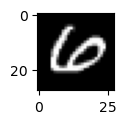

In [36]:

    plt.figure(figsize=(1,1))
    plt.imshow(train_data.iloc[0,1:].values.reshape(28,28),cmap='gray')  

In [14]:
#!pip install tensorflow

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model=Sequential()
model.add(Dense(units=400, activation='relu', input_dim=784, name='Dense'))
model.add(Dense(units=10, activation='softmax',name='Output'))   #400 units of 1st layer * 10 new nodes + 10 bias =4010

C:\Users\dnyan\anaconda4\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Dense (Dense)                        │ (None, 400)                 │         314,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 10)                  │           4,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 318,010 (1.21 MB)

 Trainable params: 318,010 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.weights  # for first layer shape=(784, 400)<- weights , shape=(400,) <- bias #for second layer shape=(400, 10)<- weights , shape=(10,)<- bias

[<KerasVariable shape=(784, 400), dtype=float32, path=sequential/Dense/kernel>,
 <KerasVariable shape=(400,), dtype=float32, path=sequential/Dense/bias>,
 <KerasVariable shape=(400, 10), dtype=float32, path=sequential/Output/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=sequential/Output/bias>]

In [19]:
len(model.weights)

4

In [20]:
model.weights[0].shape

TensorShape([784, 400])

In [21]:
model.weights[1].shape

TensorShape([400])

In [22]:
model.weights[2].shape

TensorShape([400, 10])

In [23]:
x=train_data.iloc[:,1:].values/255.

In [24]:
y=train_data.iloc[:,0].values

In [25]:
print(x.shape,y.shape)

(20000, 784) (20000,)


In [26]:
#traning our model      # combining model and data
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])  # curently best optimizer is adam   #loss is based on activation function of last layer
#whenever you have softmax in ypur output layer and you have categorical numeric y value then you see sparse_categorical_crossentropy
model.fit(x,y,batch_size=64,epochs=3)  #batch size is no of rows passed once ,hence batches here 20000/64  #by default batch_size is 64

Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8190 - loss: 0.6298
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9481 - loss: 0.1795
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9673 - loss: 0.1145
